# Sarcasm Detection in Twitter Comments

In [1]:
import pandas as pd
import numpy as np
import emoji
import nltk
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

### Loading Text File into Pandas DataFrame

In [2]:
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Test_v1.txt", delimiter='\t')

In [3]:
df.head()

,TrainSen,1,I loovee when people text back ... 😒 #sarcastictweet
0,TrainSen,1,Don't you love it when your parents are Pissed...
1,TrainSen,1,"So many useless classes , great to be student"
2,TrainSen,1,Oh how I love getting home from work at 3am an...
3,TrainSen,1,I just love having grungy ass hair 😑 #not
4,TrainSen,1,"Thank you , random guy , for sneaking up behin..."


## Reading, Renaming Columns, and Saving DataFrame to CSV

In [4]:
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\Test_v1.txt', header=None, delimiter='\t')

# name the columns
df.columns = ['Train', 'Label', 'Tweets']

print(df.head())

df.to_csv('Clean_Dataset.csv', index=False)

      Train  Label                                             Tweets
0  TrainSen      1  I loovee when people text back ... 😒 #sarcasti...
1  TrainSen      1  Don't you love it when your parents are Pissed...
2  TrainSen      1      So many useless classes , great to be student
3  TrainSen      1  Oh how I love getting home from work at 3am an...
4  TrainSen      1          I just love having grungy ass hair 😑 #not


## Drop the 'Train' column

In [5]:
if df.shape[1] == 3:
    df.columns = ['Train', 'Label', 'Tweets']
    
    # Drop the 'Train' column
    df = df.drop(columns=['Train'])
  
    df.to_csv('Clean_Dataset.csv', index=False)
else:
    print("Unexpected number of columns in the dataset. Expected 3 columns, but found:", df.shape[1])

In [6]:
df.head()

,Label,Tweets
0,1,I loovee when people text back ... 😒 #sarcasti...
1,1,Don't you love it when your parents are Pissed...
2,1,"So many useless classes , great to be student"
3,1,Oh how I love getting home from work at 3am an...
4,1,I just love having grungy ass hair 😑 #not


## Replace emojis with text descriptions in the 'Tweets' column

In [7]:
def replace_emojis(text):
    return emoji.demojize(text, delimiters=("", ""))

df = pd.read_csv('Clean_Dataset.csv')

df['Tweets'] = df['Tweets'].apply(replace_emojis)

df.to_csv('Clean_Dataset.csv', index=False)

print(df.head())

   Label                                             Tweets
0      1  I loovee when people text back ... unamused_fa...
1      1  Don't you love it when your parents are Pissed...
2      1      So many useless classes , great to be student
3      1  Oh how I love getting home from work at 3am an...
4      1  I just love having grungy ass hair expressionl...


## Remove '#' with its following text from tweets

In [8]:
df = pd.read_csv('Clean_Dataset.csv')

# Remove '#' with its following text from tweets
df['Tweets'] = df['Tweets'].str.replace(r'#\w+', '', regex=True)

df.to_csv('Clean_Dataset.csv', index=False)

## Replace abbreviations with their expansions

In [9]:
# Define a dictionary of abbreviations and their expansions
abbreviations = {
    'lol': 'laugh out loud',
    'brb': 'be right back',
    'btw': 'by the way',
    'omg': 'oh my god',
    'tbh': 'to be honest',
    'fyi': 'for your information',
    'idk': 'I don\'t know',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'np': 'no problem',
    'tmi': 'too much information',
    'smh': 'shake my head',
    'irl': 'in real life',
    'afk': 'away from keyboard',
    'fomo': 'fear of missing out',
    'imo': 'in my opinion',
    'irl': 'in real life',
    'omw': 'on my way',
    'rofl': 'rolling on the floor laughing',
    'afaik': 'as far as I know',
    'gg': 'good game',
    'ggwp': 'good game, well played',
    'icymi': 'in case you missed it',
    'nvm': 'never mind',
    'ttyl': 'talk to you later',
    'ftw': 'for the win',
    'smh': 'shaking my head',
}

# Function to replace abbreviations with their expansions
def replace_abbreviations(text):
    for word in text.split():
        if word.lower() in abbreviations:
            text = text.replace(word, abbreviations[word.lower()])
    return text

df = pd.read_csv('Clean_Dataset.csv')
df['Tweets'] = df['Tweets'].apply(replace_abbreviations)
df.to_csv('Clean_Dataset.csv', index=False)

## Check for Garbage value

In [10]:
#Garbage value
for i in df.select_dtypes(include = "object").columns:
    print(df[i].value_counts())
    print("***"*10)

Tweets
I loovee when people text back ... unamused_face                                                                       1
MilesLong they don't listen ... seriously                                                                              1
Been in the UK so I'm just catching up with Saturated - can't wait to hear God speak through your sermon !             1
my ex is gonna start watching fairy tail im so happy i'll be able to speak to him about it                             1
This lab class boring af                                                                                               1
                                                                                                                      ..
I lost AJ Green and Jamaal Charles from the same  team on Sunday , Maybe my tight end puts up 40 points                1
Good thing I have a doctors appointment in the morning . Good thing it's passed 3 am .                                 1
Good thing I'm learning a

## Check for Duplicated

In [11]:
df.duplicated().sum()

0

## Check for Null value

In [12]:
df.isnull().sum()

Label     0
Tweets    0
dtype: int64

## Removing Special Characters from Tweets and Saving to CSV

In [13]:
df = pd.read_csv('Clean_Dataset.csv')
df['Tweets'] = df['Tweets'].str.replace('#', '')
df['Tweets'] = df['Tweets'].str.replace('"', '')
df['Tweets'] = df['Tweets'].str.replace(':', '')
df['Tweets'] = df['Tweets'].str.replace(':', '')
df['Tweets'] = df['Tweets'].str.replace('?', '')
df['Tweets'] = df['Tweets'].str.replace('*', '')
df['Tweets'] = df['Tweets'].str.replace('<', '')
df['Tweets'] = df['Tweets'].str.replace('...', '')
df['Tweets'] = df['Tweets'].str.replace('/', '')
df['Tweets'] = df['Tweets'].str.replace('@', '')
df['Tweets'] = df['Tweets'].str.replace('~', '')
df['Tweets'] = df['Tweets'].str.replace('!', '')
df['Tweets'] = df['Tweets'].str.replace('>', '')
df['Tweets'] = df['Tweets'].str.replace('-', '')
df['Tweets'] = df['Tweets'].str.replace(')', '')
df['Tweets'] = df['Tweets'].str.replace('(', '')
df['Tweets'] = df['Tweets'].str.replace('3', '')
df.to_csv('Clean_Dataset.csv', index=False)

## Replace 1 with 'sarcastic' and 0 with 'not sarcastic' in the 'Label' column

In [14]:
df = pd.read_csv('Clean_Dataset.csv')

# Replace 1 with 'sarcastic' and 0 with 'not sarcastic' in the 'Label' column
df['Label'] = df['Label'].replace({1: 'sarcastic', 0: 'not sarcastic'})

df.to_csv('Clean_Dataset.csv', index=False)

In [15]:
df.head()

,Label,Tweets
0,sarcastic,I loovee when people text back unamused_face
1,sarcastic,Don't you love it when your parents are Pissed...
2,sarcastic,"So many useless classes , great to be student"
3,sarcastic,Oh how I love getting home from work at am and...
4,sarcastic,I just love having grungy ass hair expressionl...


In [16]:
df.dtypes

Label     object
Tweets    object
dtype: object

## Remove URLs from the 'Tweets' column

In [17]:
df = pd.read_csv('Clean_Dataset.csv')

# Remove URLs from the 'Tweets' column
df['Tweets'] = df['Tweets'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)

df.to_csv('C:\\Users\\HP\\OneDrive\\Desktop\\Clean_Dataset.csv', index=False)

## Merge two dataset

In [18]:
df1 = pd.read_csv("C:\\Users\\HP\\Downloads\\fd1.csv")
df2 = pd.read_csv('Clean_Dataset.csv')

df1 = df1.rename(columns={"sarcsam": "Sarcasm", "tweet": "Tweet"})
df2 = df2.rename(columns={"Label": "Sarcasm", "Tweets": "Tweet"})

df1['Sarcasm'] = df1['Sarcasm'].replace({'sarcastic': 'yes', 'non sarcastic': 'no', 'not sarcastic': 'no'})
merged_df = pd.concat([df1[['Tweet', 'Sarcasm']], df2[['Tweet', 'Sarcasm']]], ignore_index=True)

merged_df.to_csv('Merge.csv', index=False)


In [19]:
merged_df.head()

,Tweet,Sarcasm
0,Fantastic service yet again from EE. 1st you u...,yes
1,Not sure if that was or. I will take it! face_...,yes
2,Barely 9 am and already shaking with rage.,yes
3,I guess that proves it then. Black folks have ...,yes
4,Does this tweet need a tag,yes


## Word Tokenization

In [20]:
tokenizer = TweetTokenizer()

def tokenize_text(Tweets):
    return tokenizer.tokenize(Tweets)

df = pd.read_csv('Merge.csv')
df['tokens'] = df['Tweet'].apply(tokenize_text)

print(df.head(15))
df.to_csv('Merge.csv', index=False)

                                                Tweet Sarcasm  \
0   Fantastic service yet again from EE. 1st you u...     yes   
1   Not sure if that was or. I will take it! face_...     yes   
2          Barely 9 am and already shaking with rage.     yes   
3   I guess that proves it then. Black folks have ...     yes   
4                          Does this tweet need a tag     yes   
5   both. Wont be using you again. Made a formal c...     yes   
6                Fuuuuuuuuck this shit screams thug!!     yes   
7   66 UEs from Staniel and he wins in straights. ...     yes   
8              totally surprising to every husker fan     yes   
9                     Haha got to love the enthusiasm     yes   
10  a southern pride advocate but of course it has...     yes   
11  So nice not hearing any rumors that the  are n...     yes   
12  We should divide illegals into two lines one f...     yes   
13      does not even look like that great of a view.     yes   
14  Mondays are always dr

### Converting Sarcasm Labels to Binary Values

In [21]:
df['Sarcasm'] = df['Sarcasm'].map({'yes': 1, 'no': 0, 'sarcastic': 1, 'not sarcastic': 0})
df.head()

,Tweet,Sarcasm,tokens
0,Fantastic service yet again from EE. 1st you u...,1,"[Fantastic, service, yet, again, from, EE, ., ..."
1,Not sure if that was or. I will take it! face_...,1,"[Not, sure, if, that, was, or, ., I, will, tak..."
2,Barely 9 am and already shaking with rage.,1,"[Barely, 9, am, and, already, shaking, with, r..."
3,I guess that proves it then. Black folks have ...,1,"[I, guess, that, proves, it, then, ., Black, f..."
4,Does this tweet need a tag,1,"[Does, this, tweet, need, a, tag]"


### Splitting Data into Training and Testing Sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sarcasm'], test_size=0.2, random_state=42)

### Creating TF-IDF Vectors for Text Data

In [23]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Function for Model Evaluation

In [24]:
def evaluate_model(y_test, y_pred, y_pred_prob):
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [25]:
df

,Tweet,Sarcasm,tokens
0,Fantastic service yet again from EE. 1st you u...,1,"[Fantastic, service, yet, again, from, EE, ., ..."
1,Not sure if that was or. I will take it! face_...,1,"[Not, sure, if, that, was, or, ., I, will, tak..."
2,Barely 9 am and already shaking with rage.,1,"[Barely, 9, am, and, already, shaking, with, r..."
3,I guess that proves it then. Black folks have ...,1,"[I, guess, that, proves, it, then, ., Black, f..."
4,Does this tweet need a tag,1,"[Does, this, tweet, need, a, tag]"
...,...,...,...
2976,Sometimes truth is glaring you in the face bl...,0,"[Sometimes, truth, is, glaring, you, in, the, ..."
2977,I just love not hanging out with my boyfriend .,0,"[I, just, love, not, hanging, out, with, my, b..."
2978,There is this 1 quince picture I have that I'm...,0,"[There, is, this, 1, quince, picture, I, have,..."
2979,I feel so ill at the moment that I cant speak ...,0,"[I, feel, so, ill, at, the, moment, that, I, c..."


## Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
y_pred_prob_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]

Accuracy: 79.40%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       250
           1       0.78      0.91      0.84       347

    accuracy                           0.79       597
   macro avg       0.80      0.77      0.78       597
weighted avg       0.80      0.79      0.79       597



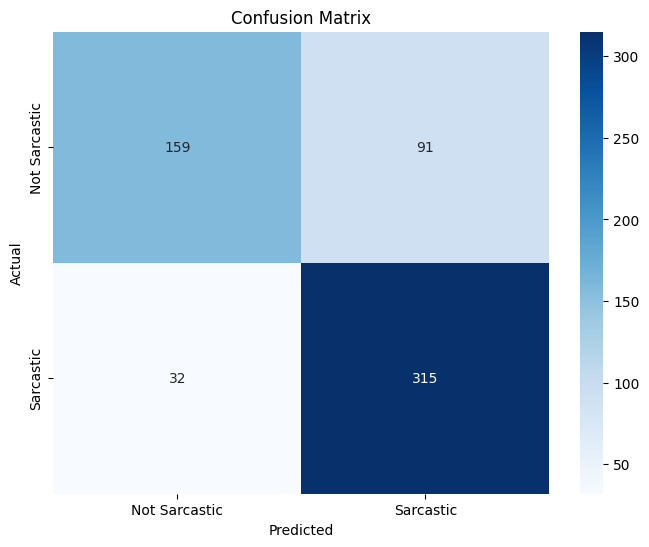

In [27]:
evaluate_model(y_test, y_pred_rf, y_pred_prob_rf)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Accuracy: 80.07%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       250
           1       0.78      0.92      0.84       347

    accuracy                           0.80       597
   macro avg       0.81      0.78      0.79       597
weighted avg       0.81      0.80      0.79       597



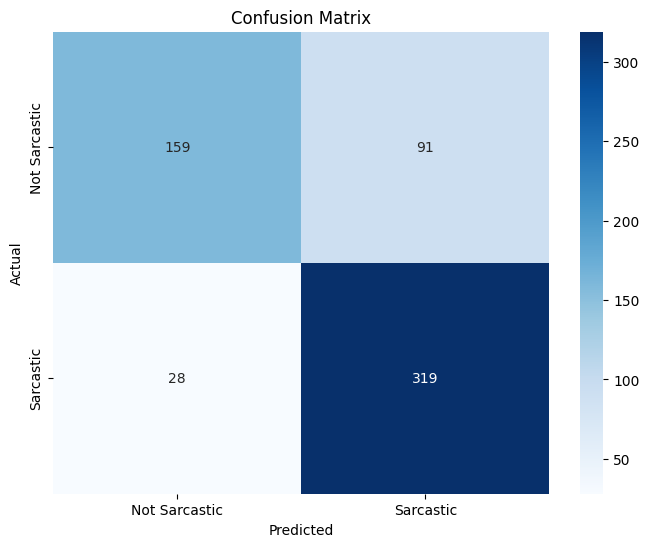

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_tfidf)
y_pred_prob_rf = best_rf_model.predict_proba(X_test_tfidf)[:, 1]

# Evaluate the model
evaluate_model(y_test, y_pred_rf, y_pred_prob_rf)

print(f"Best Parameters: {best_params}")
